In [32]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import scipy as sp

from matplotlib import pyplot as plt
from scipy.stats import dirichlet, beta

In [75]:
K=1000
alpha=10
N=500

def num_clusters(alpha, K, N):
    # Sorting the probability vector helps with the cluster naming
    p = -np.sort(-dirichlet([alpha/K]*K).rvs().squeeze())
    samples = np.random.choice(K, N, p=p, replace=True) + 1
    output = [1]
    for i in range(1, len(samples)):
        if samples[i-1] in output:
            output.append(samples[i-1])
        else:
            output.append(np.max(output) + 1)
            np.where(samples == i, i, samples)
    return output

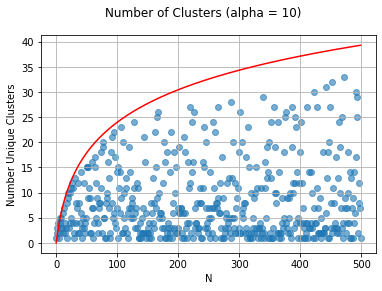

In [76]:
y = num_clusters(alpha=alpha, K=K, N=N)
fig, ax = plt.subplots()
ax.scatter(range(len(y)), y, alpha = .6)
ax.plot(range(len(y)), alpha*np.log(1 + np.divide(range(len(y)), alpha)), color = "red")
fig.suptitle("Number of Clusters (alpha = 10)")
ax.grid()
plt.xlabel("N")
plt.ylabel("Number Unique Clusters")
fig.show()

In [154]:
def stick_breaking(alpha, K):
    beta_vals = np.random.beta(1, alpha, size=K)
    remaining_lengths = np.append(1, (1 - beta_vals).cumprod(-1))[0:K]
    weights = beta_vals * remaining_lengths
    return weights

def CRP(N, alpha):
    table = [1] # First person sits at first table with probability 1
    for i in range(1, N):
        unique_tables, counts = np.unique(table, return_counts=True)
        probs = np.array(counts / (i + alpha))
        probs = np.append(probs, alpha / (i + alpha))
        table.append((np.random.choice(range(len(probs)) , p=probs)+ 1))
    return table, probs

def gen_sb_data(alpha, N, K):
    out = np.empty([N,K])
    for i in range(N):
        _,  probs = CRP(10000, alpha)
        out[i,:] = probs[:K]
    return out

def gen_dir_data(alpha, N, K):
    out = np.empty([N,K])
    for i in range(N):
        out[i,:] = -np.sort(-dirichlet([alpha/1000]*1000).rvs().squeeze())[:K]
    return out

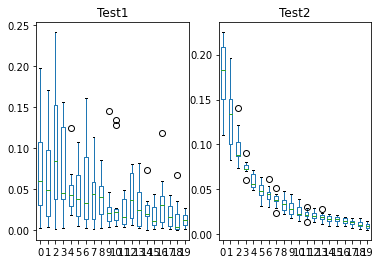

In [155]:
# dirichlet_large_k(10, 2000, 500)
# -np.sort(-dirichlet(([alpha/K]*K)).rvs())

y1 = pd.DataFrame(gen_sb_data(10, 10, 20))
y2 = pd.DataFrame(gen_dir_data(10, 10, 20))
fig, (ax1, ax2) = plt.subplots(1,2)
_ = y1.boxplot(grid=False, ax=ax1)
_ = y2.boxplot(grid=False, ax=ax2)
ax1.set_title("Test1")
ax2.set_title("Test2")
plt.show()


In [14]:
y = CRP(500,10)


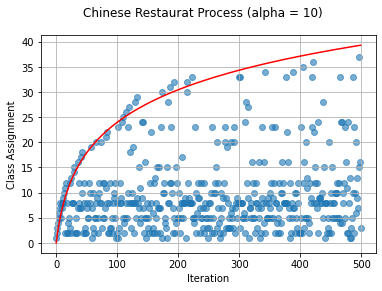

In [23]:
fig, ax = plt.subplots()
ax.scatter(range(len(y)), y, alpha = .6)
ax.plot(range(len(y)), 10*np.log(1 + np.divide(range(len(y)), 10)), color = "red")
fig.suptitle("Chinese Restaurat Process (alpha = 10)")
ax.grid()
plt.xlabel("Iteration")
plt.ylabel("Class Assignment")
fig.show()

